In [9]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [10]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [11]:
window = 10000 
df = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [12]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')
dists = []

In [13]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [14]:
len(eq_with_data)

6077

In [142]:
eq_no = 0
for eq_name in eq_with_data[0:]:
    try:
        print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
        eq_no += 1
        for event in cat_with_data:
            if eq_name == util.catEventToFileName(event):
                cat_entry = event
                break
        eq_lat= cat_entry.origins[0].latitude
        eq_long = cat_entry.origins[0].longitude
        eq_mag = cat_entry.magnitudes[0].mag
        eq_mag_str = "{:.1f}".format(eq_mag)

        data = obspy.read(root+eq_name+'/data/*/*')
        data.interpolate(100, 'lanczos', a = 20)
        inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

        with open(root+eq_name+'/picks.pkl', 'rb') as f:
            picks = pickle.load(f)
        n_records = 0
        sampling_rate = 100 # get this from tr.stats.sampling_rate
        # sensor_types = self.data_stats['sensor_types'] for automated OOP

        for i in range(0, len(data)):  # iterate through all traces
            tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
            if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():# and int(data[i].stats.sampling_rate) == 100:  # only use vertical components at stations with a pick
                try:
                    tr = data[i].copy()
                    tr.remove_response(inv)
                    pick = picks[tr_name]
                    pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                    print(pick_samples)
                    #snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples//2:500+pick_samples//2]))
                    snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                    sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                    sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
                    tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                    distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                    if distance < 200 and snr>10: 
                        dists.append(distance)
                        print(distance)

                        displ = tr.integrate()
                        abs_displ = abs(displ.data) # find absolute of trace
                        sum_abs_displ = df[eq_mag_str][int(distance//25)]
                        window = int(100 * tr.stats.sampling_rate)

                        if abs_displ[pick_samples] < 0.001:
                            sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                            current = ad[eq_mag_str][int(distance//25)]
                            current.append(abs_displ[pick_samples:pick_samples+window])
                            df[eq_mag_str][int(distance//25)] = sum_abs_displ
                            ad[eq_mag_str][int(distance//25)]= current
                            counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
                except Exception:
                    continue
    except Exception:
        print('failed', eq_no)
        continue
            

0 out of 6077
32081
98.55508587916829
32180
80.20916870963086
32176
40.86747298573802
1 out of 6077
31820
2 out of 6077
30197
3 out of 6077
31103
4 out of 6077
31792
31712
151.66841365624106
31716
31794
158.06071823827918
31780
30688
47.86774969643105
30957
62.56982267035776
30700
30907
68.27247632831288
31079
81.11927234018033
31018
91.28716492077213
31764
5 out of 6077
31348
31770
6 out of 6077
32076
67.61197753593656
7 out of 6077
8 out of 6077
31154
31008
71.5378665951732
31459
96.70968281579627
30934
99.98631166616084
31418
160.2513782894427
30685
38.122681765582335
31638
30913
84.46066044556252
31426
92.74370480510683
31228
164.4062301570291
31371
188.2309303382409
31191
113.89329686558935
9 out of 6077
10 out of 6077
31805
31538
108.72016273347263
30875
58.40645030079223
30929
54.922948260980796
31329
80.45139577695903
31636
117.36650157409917
31089
73.99653063102883
30858
30400
24.28286013683163
31436
31656
31340
86.73937182614853
31858
31281
85.93532939337999
31256
30849
54.71

KeyboardInterrupt: 

In [54]:
ad.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/ad2.csv')
df.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/df2.csv')
counts.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/counts2.csv')
aad.to_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/aad2.csv')

In [138]:
ad=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/ad2.csv', index_col=0,)
df=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/df2.csv', index_col=0)
counts=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/counts2.csv', index_col=0)
aad=pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/seismo_det/other/delay_time_dfs/aad2.csv', index_col=0)

In [136]:
ad['3.0'][0]

'[array([4.17640340e-06, 4.14732928e-06, 4.11779428e-06, ...,\n       4.36248227e-06, 4.38108051e-06, 4.39825025e-06]), array([8.49983364e-08, 8.01297726e-08, 7.47657660e-08, ...,\n       1.95486570e-07, 1.88928620e-07, 1.82029936e-07]), array([3.84171086e-07, 3.87344713e-07, 3.91494939e-07, ...,\n       1.21872899e-07, 1.18607434e-07, 1.15719838e-07]), array([7.48158869e-07, 7.43957531e-07, 7.38931821e-07, ...,\n       3.05832742e-08, 2.93977302e-08, 2.81407201e-08]), array([4.80213249e-08, 4.41729980e-08, 4.03225556e-08, ...,\n       1.82421501e-07, 1.81064316e-07, 1.79642433e-07]), array([2.22897566e-07, 2.22527864e-07, 2.22081231e-07, ...,\n       8.15922717e-07, 8.17604361e-07, 8.19114079e-07]), array([1.77270825e-07, 1.81566717e-07, 1.87075313e-07, ...,\n       3.91107532e-07, 3.91638796e-07, 3.92152242e-07]), array([2.42223303e-07, 2.73335193e-07, 3.04337284e-07, ...,\n       1.68018303e-06, 1.71188132e-06, 1.74301784e-06]), array([3.34617174e-07, 3.55821493e-07, 3.76996714e-07,

In [17]:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    #data.interpolate(100, 'lanczos', a = 20)
    
    

columns in df are magntiude bins

rows are distances


In [55]:
len(tdp_all)

NameError: name 'tdp_all' is not defined

In [56]:
len(np.median(np.array(ad['5.0'][0]), 0))

10000

In [140]:
ad

,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
0,"[array([4.17640340e-06, 4.14732928e-06, 4.1177...","[array([2.28225760e-07, 2.26467185e-07, 2.2462...","[array([1.93532702e-07, 1.91221644e-07, 1.9011...","[array([3.69123974e-07, 3.60260429e-07, 3.5122...","[array([8.17634946e-08, 8.22833870e-08, 8.2752...","[array([1.31577182e-06, 1.40540619e-06, 1.4947...","[array([7.29523774e-08, 7.40787669e-08, 7.5144...","[array([7.63997912e-07, 7.66757862e-07, 7.6934...","[array([3.31568377e-06, 3.33249842e-06, 3.3640...","[array([7.00761588e-08, 7.55039123e-08, 8.0730...",...,"[array([7.12363260e-07, 1.06954657e-06, 1.5833...",[],[],"[array([1.03576661e-07, 1.02326606e-07, 1.0107...",[],[],[],[],[],[]
1,"[array([6.31129011e-07, 6.36536711e-07, 6.4085...","[array([1.94673869e-07, 1.95268974e-07, 1.9581...","[array([2.88512271e-07, 3.31988362e-07, 3.8088...","[array([4.15313870e-08, 3.96234447e-08, 3.7694...","[array([1.51385697e-06, 1.51074798e-06, 1.5081...","[array([1.97480985e-06, 1.90908535e-06, 1.8401...","[array([2.49813967e-08, 2.58900186e-08, 2.7126...","[array([6.87770027e-08, 7.47236640e-08, 8.3712...","[array([2.28009888e-07, 2.22616984e-07, 2.1387...","[array([1.28117536e-06, 1.30411676e-06, 1.3329...",...,[],[],[],"[array([3.44654001e-07, 5.51941865e-07, 8.4898...",[],[],[],[],[],[]
2,"[array([5.89375132e-07, 5.87877051e-07, 5.8631...","[array([2.57493880e-07, 2.56657486e-07, 2.5581...","[array([1.17237451e-07, 1.19993781e-07, 1.2276...","[array([6.40772093e-08, 6.20454339e-08, 5.9992...","[array([6.14974068e-08, 2.49918011e-08, 1.3657...","[array([1.14550098e-07, 1.14754026e-07, 1.1481...","[array([1.74942751e-08, 1.88530881e-08, 2.0451...","[array([1.46360772e-07, 1.44373459e-07, 1.4237...","[array([6.78057847e-07, 6.81206027e-07, 6.8210...","[array([7.05313161e-07, 7.03970274e-07, 7.0270...",...,"[array([4.02941432e-07, 4.05625097e-07, 4.0897...",[],"[array([2.46402391e-07, 2.45490781e-07, 2.4456...","[array([8.26578775e-08, 8.23012001e-08, 8.1835...",[],[],[],[],[],[]
3,"[array([3.69300875e-07, 3.69696166e-07, 3.7020...","[array([1.03158871e-07, 1.01483785e-07, 9.9757...","[array([7.64162919e-08, 7.64477005e-08, 7.6601...","[array([2.73891704e-07, 2.77205598e-07, 2.8052...","[array([1.85731902e-07, 1.92680254e-07, 1.9960...","[array([2.07179451e-08, 2.15879723e-08, 2.2339...","[array([8.32901298e-08, 8.42268642e-08, 8.5143...","[array([9.19338685e-07, 9.14140335e-07, 9.0892...","[array([3.13670627e-07, 3.25291241e-07, 3.3812...","[array([1.08295691e-07, 1.10458089e-07, 1.1369...",...,"[array([1.53219400e-05, 1.59455775e-05, 1.6553...",[],"[array([7.41016895e-07, 8.01835481e-07, 8.8585...","[array([8.73540248e-07, 1.06083724e-06, 1.2669...",[],[],"[array([2.05592430e-07, 3.42007995e-07, 5.1556...",[],[],[]
4,"[array([1.40543028e-07, 1.43992430e-07, 1.4731...","[array([2.07194611e-07, 2.12094914e-07, 2.1698...","[array([8.76088063e-08, 8.75951773e-08, 8.7430...","[array([8.89940027e-08, 8.76154268e-08, 8.6316...","[array([3.31796241e-07, 3.23560893e-07, 3.1505...","[array([2.20013196e-07, 2.22962188e-07, 2.2662...","[array([5.39448395e-08, 5.35143974e-08, 5.3092...","[array([9.63265805e-08, 9.74059980e-08, 9.8197...","[array([5.09859670e-07, 5.09583923e-07, 5.0921...","[array([9.45843568e-08, 9.26230440e-08, 9.0627...",...,[],[],"[array([3.81449055e-07, 3.75763546e-07, 3.6780...","[array([1.13971892e-05, 1.22616079e-05, 1.3157...",[],"[array([6.38282477e-05, 6.75457896e-05, 7.1476...",[],[],[],[]
5,"[array([2.10230182e-07, 2.09483727e-07, 2.0870...","[array([8.76908312e-08, 8.85242307e-08, 8.9389...","[array([2.26701774e-07, 2.29714541e-07, 2.3278...","[array([2.32718733e-07, 2.38171138e-07, 2.4358...","[array([5.04643402e-08, 5.02358626e-08, 4.9672...","[array([1.10859212e-06, 1.10751192e-06, 1.1058...","[array([4.05614069e-08, 4.06486672e-08, 4.0754...","[array([1.05698916e-07, 1.03685044e-07, 1.0122...","[array([2.80404616e-06, 2.80404936e-06, 2.8039...","[array([1.84220787e-07, 1.8

In [139]:
ad

,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
0,"[array([4.17640340e-06, 4.14732928e-06, 4.1177...","[array([2.28225760e-07, 2.26467185e-07, 2.2462...","[array([1.93532702e-07, 1.91221644e-07, 1.9011...","[array([3.69123974e-07, 3.60260429e-07, 3.5122...","[array([8.17634946e-08, 8.22833870e-08, 8.2752...","[array([1.31577182e-06, 1.40540619e-06, 1.4947...","[array([7.29523774e-08, 7.40787669e-08, 7.5144...","[array([7.63997912e-07, 7.66757862e-07, 7.6934...","[array([3.31568377e-06, 3.33249842e-06, 3.3640...","[array([7.00761588e-08, 7.55039123e-08, 8.0730...",...,"[array([7.12363260e-07, 1.06954657e-06, 1.5833...",[],[],"[array([1.03576661e-07, 1.02326606e-07, 1.0107...",[],[],[],[],[],[]
1,"[array([6.31129011e-07, 6.36536711e-07, 6.4085...","[array([1.94673869e-07, 1.95268974e-07, 1.9581...","[array([2.88512271e-07, 3.31988362e-07, 3.8088...","[array([4.15313870e-08, 3.96234447e-08, 3.7694...","[array([1.51385697e-06, 1.51074798e-06, 1.5081...","[array([1.97480985e-06, 1.90908535e-06, 1.8401...","[array([2.49813967e-08, 2.58900186e-08, 2.7126...","[array([6.87770027e-08, 7.47236640e-08, 8.3712...","[array([2.28009888e-07, 2.22616984e-07, 2.1387...","[array([1.28117536e-06, 1.30411676e-06, 1.3329...",...,[],[],[],"[array([3.44654001e-07, 5.51941865e-07, 8.4898...",[],[],[],[],[],[]
2,"[array([5.89375132e-07, 5.87877051e-07, 5.8631...","[array([2.57493880e-07, 2.56657486e-07, 2.5581...","[array([1.17237451e-07, 1.19993781e-07, 1.2276...","[array([6.40772093e-08, 6.20454339e-08, 5.9992...","[array([6.14974068e-08, 2.49918011e-08, 1.3657...","[array([1.14550098e-07, 1.14754026e-07, 1.1481...","[array([1.74942751e-08, 1.88530881e-08, 2.0451...","[array([1.46360772e-07, 1.44373459e-07, 1.4237...","[array([6.78057847e-07, 6.81206027e-07, 6.8210...","[array([7.05313161e-07, 7.03970274e-07, 7.0270...",...,"[array([4.02941432e-07, 4.05625097e-07, 4.0897...",[],"[array([2.46402391e-07, 2.45490781e-07, 2.4456...","[array([8.26578775e-08, 8.23012001e-08, 8.1835...",[],[],[],[],[],[]
3,"[array([3.69300875e-07, 3.69696166e-07, 3.7020...","[array([1.03158871e-07, 1.01483785e-07, 9.9757...","[array([7.64162919e-08, 7.64477005e-08, 7.6601...","[array([2.73891704e-07, 2.77205598e-07, 2.8052...","[array([1.85731902e-07, 1.92680254e-07, 1.9960...","[array([2.07179451e-08, 2.15879723e-08, 2.2339...","[array([8.32901298e-08, 8.42268642e-08, 8.5143...","[array([9.19338685e-07, 9.14140335e-07, 9.0892...","[array([3.13670627e-07, 3.25291241e-07, 3.3812...","[array([1.08295691e-07, 1.10458089e-07, 1.1369...",...,"[array([1.53219400e-05, 1.59455775e-05, 1.6553...",[],"[array([7.41016895e-07, 8.01835481e-07, 8.8585...","[array([8.73540248e-07, 1.06083724e-06, 1.2669...",[],[],"[array([2.05592430e-07, 3.42007995e-07, 5.1556...",[],[],[]
4,"[array([1.40543028e-07, 1.43992430e-07, 1.4731...","[array([2.07194611e-07, 2.12094914e-07, 2.1698...","[array([8.76088063e-08, 8.75951773e-08, 8.7430...","[array([8.89940027e-08, 8.76154268e-08, 8.6316...","[array([3.31796241e-07, 3.23560893e-07, 3.1505...","[array([2.20013196e-07, 2.22962188e-07, 2.2662...","[array([5.39448395e-08, 5.35143974e-08, 5.3092...","[array([9.63265805e-08, 9.74059980e-08, 9.8197...","[array([5.09859670e-07, 5.09583923e-07, 5.0921...","[array([9.45843568e-08, 9.26230440e-08, 9.0627...",...,[],[],"[array([3.81449055e-07, 3.75763546e-07, 3.6780...","[array([1.13971892e-05, 1.22616079e-05, 1.3157...",[],"[array([6.38282477e-05, 6.75457896e-05, 7.1476...",[],[],[],[]
5,"[array([2.10230182e-07, 2.09483727e-07, 2.0870...","[array([8.76908312e-08, 8.85242307e-08, 8.9389...","[array([2.26701774e-07, 2.29714541e-07, 2.3278...","[array([2.32718733e-07, 2.38171138e-07, 2.4358...","[array([5.04643402e-08, 5.02358626e-08, 4.9672...","[array([1.10859212e-06, 1.10751192e-06, 1.1058...","[array([4.05614069e-08, 4.06486672e-08, 4.0754...","[array([1.05698916e-07, 1.03685044e-07, 1.0122...","[array([2.80404616e-06, 2.80404936e-06, 2.8039...","[array([1.84220787e-07, 1.8

In [116]:
ad

,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
0,"[array([4.17640340e-06, 4.14732928e-06, 4.1177...","[array([2.28225760e-07, 2.26467185e-07, 2.2462...","[array([1.93532702e-07, 1.91221644e-07, 1.9011...","[array([3.69123974e-07, 3.60260429e-07, 3.5122...","[array([8.17634946e-08, 8.22833870e-08, 8.2752...","[array([1.31577182e-06, 1.40540619e-06, 1.4947...","[array([7.29523774e-08, 7.40787669e-08, 7.5144...","[array([7.63997912e-07, 7.66757862e-07, 7.6934...","[array([3.31568377e-06, 3.33249842e-06, 3.3640...","[array([7.00761588e-08, 7.55039123e-08, 8.0730...",...,"[array([7.12363260e-07, 1.06954657e-06, 1.5833...",[],[],"[array([1.03576661e-07, 1.02326606e-07, 1.0107...",[],[],[],[],[],[]
1,"[array([6.31129011e-07, 6.36536711e-07, 6.4085...","[array([1.94673869e-07, 1.95268974e-07, 1.9581...","[array([2.88512271e-07, 3.31988362e-07, 3.8088...","[array([4.15313870e-08, 3.96234447e-08, 3.7694...","[array([1.51385697e-06, 1.51074798e-06, 1.5081...","[array([1.97480985e-06, 1.90908535e-06, 1.8401...","[array([2.49813967e-08, 2.58900186e-08, 2.7126...","[array([6.87770027e-08, 7.47236640e-08, 8.3712...","[array([2.28009888e-07, 2.22616984e-07, 2.1387...","[array([1.28117536e-06, 1.30411676e-06, 1.3329...",...,[],[],[],"[array([3.44654001e-07, 5.51941865e-07, 8.4898...",[],[],[],[],[],[]
2,"[array([5.89375132e-07, 5.87877051e-07, 5.8631...","[array([2.57493880e-07, 2.56657486e-07, 2.5581...","[array([1.17237451e-07, 1.19993781e-07, 1.2276...","[array([6.40772093e-08, 6.20454339e-08, 5.9992...","[array([6.14974068e-08, 2.49918011e-08, 1.3657...","[array([1.14550098e-07, 1.14754026e-07, 1.1481...","[array([1.74942751e-08, 1.88530881e-08, 2.0451...","[array([1.46360772e-07, 1.44373459e-07, 1.4237...","[array([6.78057847e-07, 6.81206027e-07, 6.8210...","[array([7.05313161e-07, 7.03970274e-07, 7.0270...",...,"[array([4.02941432e-07, 4.05625097e-07, 4.0897...",[],"[array([2.46402391e-07, 2.45490781e-07, 2.4456...","[array([8.26578775e-08, 8.23012001e-08, 8.1835...",[],[],[],[],[],[]
3,"[array([3.69300875e-07, 3.69696166e-07, 3.7020...","[array([1.03158871e-07, 1.01483785e-07, 9.9757...","[array([7.64162919e-08, 7.64477005e-08, 7.6601...","[array([2.73891704e-07, 2.77205598e-07, 2.8052...","[array([1.85731902e-07, 1.92680254e-07, 1.9960...","[array([2.07179451e-08, 2.15879723e-08, 2.2339...","[array([8.32901298e-08, 8.42268642e-08, 8.5143...","[array([9.19338685e-07, 9.14140335e-07, 9.0892...","[array([3.13670627e-07, 3.25291241e-07, 3.3812...","[array([1.08295691e-07, 1.10458089e-07, 1.1369...",...,"[array([1.53219400e-05, 1.59455775e-05, 1.6553...",[],"[array([7.41016895e-07, 8.01835481e-07, 8.8585...","[array([8.73540248e-07, 1.06083724e-06, 1.2669...",[],[],"[array([2.05592430e-07, 3.42007995e-07, 5.1556...",[],[],[]
4,"[array([1.40543028e-07, 1.43992430e-07, 1.4731...","[array([2.07194611e-07, 2.12094914e-07, 2.1698...","[array([8.76088063e-08, 8.75951773e-08, 8.7430...","[array([8.89940027e-08, 8.76154268e-08, 8.6316...","[array([3.31796241e-07, 3.23560893e-07, 3.1505...","[array([2.20013196e-07, 2.22962188e-07, 2.2662...","[array([5.39448395e-08, 5.35143974e-08, 5.3092...","[array([9.63265805e-08, 9.74059980e-08, 9.8197...","[array([5.09859670e-07, 5.09583923e-07, 5.0921...","[array([9.45843568e-08, 9.26230440e-08, 9.0627...",...,[],[],"[array([3.81449055e-07, 3.75763546e-07, 3.6780...","[array([1.13971892e-05, 1.22616079e-05, 1.3157...",[],"[array([6.38282477e-05, 6.75457896e-05, 7.1476...",[],[],[],[]
5,"[array([2.10230182e-07, 2.09483727e-07, 2.0870...","[array([8.76908312e-08, 8.85242307e-08, 8.9389...","[array([2.26701774e-07, 2.29714541e-07, 2.3278...","[array([2.32718733e-07, 2.38171138e-07, 2.4358...","[array([5.04643402e-08, 5.02358626e-08, 4.9672...","[array([1.10859212e-06, 1.10751192e-06, 1.1058...","[array([4.05614069e-08, 4.06486672e-08, 4.0754...","[array([1.05698916e-07, 1.03685044e-07, 1.0122...","[array([2.80404616e-06, 2.80404936e-06, 2.8039...","[array([1.84220787e-07, 1.8

In [119]:
aad

,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
0,[1.03726842e-07 1.02083842e-07 1.04091061e-07 ...,[9.58448724e-08 9.76617702e-08 9.82877190e-08 ...,[1.30907099e-07 1.34067253e-07 1.34115645e-07 ...,[1.23138570e-07 1.21316438e-07 1.24811287e-07 ...,[1.10462882e-07 1.13922713e-07 1.15859569e-07 ...,[9.74172166e-08 9.93035726e-08 9.86306693e-08 ...,[8.44844538e-08 8.40696812e-08 8.42836399e-08 ...,[1.18717208e-07 1.20580796e-07 1.19114083e-07 ...,[8.91734363e-08 9.60394175e-08 1.05317906e-07 ...,[7.53988350e-08 7.93773978e-08 1.03422129e-07 ...,...,[7.12363260e-07 1.06954657e-06 1.58334541e-06 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[9.57065085e-08 9.55243359e-08 9.60123173e-08 ...,[8.67733107e-08 8.72762167e-08 8.88354492e-08 ...,[9.79409103e-08 9.93839025e-08 1.01987867e-07 ...,[8.07142839e-08 8.02037948e-08 7.99860447e-08 ...,[1.21775022e-07 1.26219867e-07 1.28770936e-07 ...,[8.08734732e-08 8.14315389e-08 8.11665000e-08 ...,[1.00935543e-07 9.79913325e-08 9.60145747e-08 ...,[8.71419623e-08 8.68826603e-08 8.87767039e-08 ...,[8.28321604e-08 9.03521001e-08 9.09693850e-08 ...,[1.03521490e-07 1.05091081e-07 1.08262760e-07 ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[9.85497816e-08 9.91143155e-08 9.98477051e-08 ...,[8.53164897e-08 8.55681475e-08 8.73257700e-08 ...,[7.43623775e-08 7.55828988e-08 7.50257042e-08 ...,[9.59884993e-08 9.60083621e-08 9.50845083e-08 ...,[1.05921985e-07 1.06003671e-07 1.09064183e-07 ...,[8.40366917e-08 8.16390754e-08 8.27190440e-08 ...,[8.54125464e-08 8.70459247e-08 9.10917273e-08 ...,[9.83583463e-08 9.84310661e-08 9.74899485e-08 ...,[7.69735625e-08 7.74250503e-08 7.84568577e-08 ...,[7.80651349e-08 7.89844272e-08 8.64654535e-08 ...,...,NaN,NaN,[2.46402391e-07 2.45490781e-07 2.44567072e-07 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[8.61147761e-08 8.78727144e-08 8.93923484e-08 ...,[6.90866593e-08 6.91281238e-08 6.74905724e-08 ...,[8.37524474e-08 8.58790820e-08 8.72726384e-08 ...,[8.18791985e-08 8.16296252e-08 8.10311693e-08 ...,[8.67271283e-08 8.74279439e-08 8.82358523e-08 ...,[7.29677777e-08 7.35201162e-08 7.26621258e-08 ...,[9.92609541e-08 1.00402587e-07 1.01185883e-07 ...,[8.50273145e-08 8.60229956e-08 8.75137462e-08 ...,[8.12127726e-08 8.13711391e-08 8.30845042e-08 ...,[9.63158085e-08 9.72921073e-08 9.79481994e-08 ...,...,[1.22861700e-05 1.26714532e-05 1.30482147e-05 ...,NaN,NaN,[1.16663607e-06 1.30622709e-06 1.45764843e-06 ...,NaN,NaN,[2.05592430e-07 3.42007995e-07 5.15563351e-07 ...,NaN,NaN,NaN
4,[7.42920746e-08 7.49770821e-08 7.43936428e-08 ...,[7.66166315e-08 7.66532592e-08 7.67482139e-08 ...,[7.33610983e-08 7.32716455e-08 7.27672967e-08 ...,[8.24516759e-08 8.36994160e-08 8.36094786e-08 ...,[8.58632754e-08 8.62978264e-08 8.76457073e-08 ...,[8.33134229e-08 8.43585084e-08 8.35109460e-08 ...,[7.66786778e-08 7.75491448e-08 7.76827982e-08 ...,[8.21781178e-08 8.10101166e-08 8.02052892e-08 ...,[9.28356706e-08 9.23893730e-08 9.49122677e-08 ...,[9.05514357e-08 9.06768938e-08 9.12346443e-08 ...,...,NaN,NaN,NaN,NaN,NaN,[6.38282477e-05 6.75457896e-05 7.14769079e-05 ...,NaN,NaN,NaN,NaN
5,[6.49770549e-08 6.37427383e-08 6.37561456e-08 ...,[6.38456936e-08 6.44626609e-08 6.49020719e-08 ...,[7.74143615e-08 7.72483608e-08 7.58290060e-08 ...,[7.70066588e-08 7.73205464e-08 7.77699711e-08 ...,[7.52883449e-08 7.42804521e-08 7.56969452e-08 ...,[7.90011044e-08 8.01297721e-08 8.14254350e-08 ...,[1.03301166e-07 1.03848203e-07 1.04897468e-07 ...,[7.16215669e-08 7.10252173e-08 7.35457498e-08 ...,[1.03444046e-07 1.04163827e-07 1.05812631e-07 ...,[7.89096374e-08 7.76689996e-08 8.13757897e-08 ...,...,NaN,NaN,NaN,[2.96224821e-06 3.19281461e-06 3.43627932e-06 ...,NaN,[3.66035750e-08 3.94150591e-08 4.21872501e-08 ...,NaN,NaN,NaN,NaN
6,[6.86962137e-08 7.06720469e-08 7.27016771e-08 ...,[7.11852686e-08 7.17076527e-08 7.20181110e-08 ...,[7.26839807e-08 7.29351793e-08 7.51353561e-08 ...,[9.30934649e-08 9.30214083e-08 9.16195195e-08 ...,[7.46795540e-08 7.41803364e-08 7.36900540e-08 ...,[7.59651079e-08 7.7

In [122]:
column

'3.0'

In [123]:
row

0

In [141]:
ad['3.0'][0][1:-2]

'array([4.17640340e-06, 4.14732928e-06, 4.11779428e-06, ...,\n       4.36248227e-06, 4.38108051e-06, 4.39825025e-06]), array([8.49983364e-08, 8.01297726e-08, 7.47657660e-08, ...,\n       1.95486570e-07, 1.88928620e-07, 1.82029936e-07]), array([3.84171086e-07, 3.87344713e-07, 3.91494939e-07, ...,\n       1.21872899e-07, 1.18607434e-07, 1.15719838e-07]), array([7.48158869e-07, 7.43957531e-07, 7.38931821e-07, ...,\n       3.05832742e-08, 2.93977302e-08, 2.81407201e-08]), array([4.80213249e-08, 4.41729980e-08, 4.03225556e-08, ...,\n       1.82421501e-07, 1.81064316e-07, 1.79642433e-07]), array([2.22897566e-07, 2.22527864e-07, 2.22081231e-07, ...,\n       8.15922717e-07, 8.17604361e-07, 8.19114079e-07]), array([1.77270825e-07, 1.81566717e-07, 1.87075313e-07, ...,\n       3.91107532e-07, 3.91638796e-07, 3.92152242e-07]), array([2.42223303e-07, 2.73335193e-07, 3.04337284e-07, ...,\n       1.68018303e-06, 1.71188132e-06, 1.74301784e-06]), array([3.34617174e-07, 3.55821493e-07, 3.76996714e-07, 

In [125]:
np.median(np.array(ad[column][row]), 0)

AxisError: axis 0 is out of bounds for array of dimension 0

onto row/column plot


AxisError: axis 0 is out of bounds for array of dimension 0

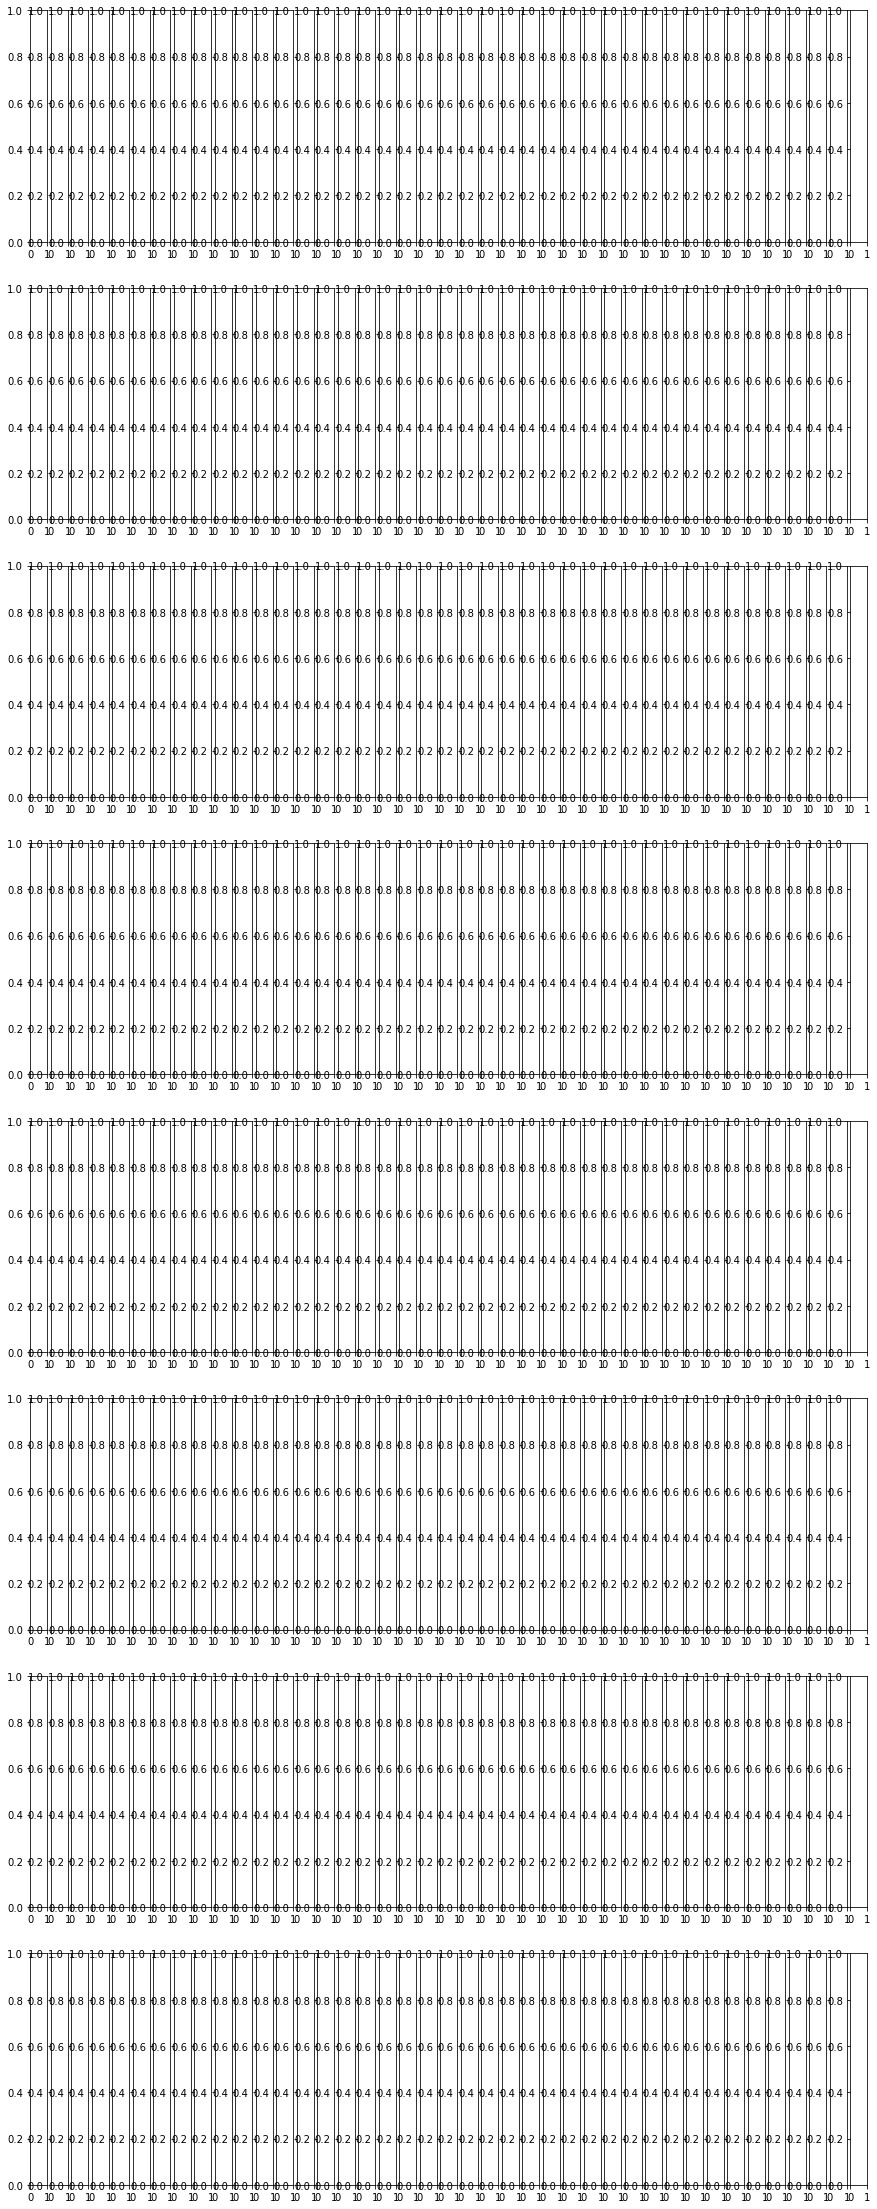

In [121]:
fig, axs = plt.subplots(8, len(df.columns), figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns:
        #try:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        aad[column][row]=np.median(np.array(ad[column][row]), 0)
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = DPD_time*100 # sampling rate is 100 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row

        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            print(T_dp[0:5])
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                axs[row_count][col_count].vlines(T_dp[i]-0.05, 0.0001, 1, zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:500]), zorder = 50, color = 'red')
        for ind_ad in ad[column][row]:
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), ind_ad[:500]/max(ind_ad[:500]), color='lightgrey')
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
        #except Exception:
        #    continue
        #    col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [30]:
results

[[['3.0', 0, 0.29, 446],
  ['3.1', 0, 0.27, 446],
  ['3.2', 0, 0.29, 446],
  ['3.3', 0, 0.31, 446],
  ['3.4', 0, 0.37, 447],
  ['3.5', 0, 0.31, 446],
  ['3.6', 0, 0.35, 443],
  ['3.7', 0, 0.44, 447],
  ['3.8', 0, 0.37, 446],
  ['3.9', 0, 0.36, 447],
  ['4.0', 0, 0.35, 406],
  ['4.1', 0, 0.49, 407],
  ['4.2', 0, 0.34, 307],
  ['4.3', 0, 0.43, 39],
  ['4.4', 0, 0.59, 39],
  ['4.5', 0, 0.67, 407],
  ['4.6', 0, 0.42, 407],
  ['4.7', 0, 0.77, 407],
  ['4.8', 0, 0.43, 36],
  ['4.9', 0, 0.5, 407],
  ['5.0', 0, 0.51, 2],
  ['5.1', 0, 1.71, 2],
  ['5.2', 0, 0.63, 2],
  ['5.3', 0, 0.7, 3],
  ['5.5', 0, 0.66, 2],
  ['5.6', 0, 0.92, 3],
  ['6.0', 0, 0.56, 1],
  ['6.1', 0, 1.57, 1]],
 [['3.0', 1, 0.28, 629],
  ['3.1', 1, 0.27, 629],
  ['3.2', 1, 0.28, 629],
  ['3.3', 1, 0.28, 629],
  ['3.4', 1, 0.34, 630],
  ['3.5', 1, 0.29, 629],
  ['3.6', 1, 0.34, 629],
  ['3.7', 1, 0.34, 630],
  ['3.8', 1, 0.33, 629],
  ['3.9', 1, 0.37, 630],
  ['4.0', 1, 0.4, 628],
  ['4.1', 1, 0.46, 629],
  ['4.2', 1, 0.43, 44

onto row/column plot
[0.27 0.36 0.54 0.91 2.34]
3.0 0 0.27 605
[0.27 0.41 0.57 0.78 1.19]
3.1 0 0.27 595
[0.27 0.5  0.65 0.73 0.97]
3.2 0 0.27 606
[0.31 0.37 0.55 0.75 0.95]
3.3 0 0.31 606
[0.29 0.47 0.93 1.09 1.25]
3.0 1 0.29 893
[0.27 0.43 0.56 1.23 1.72]
3.1 1 0.27 894
[0.28 1.   1.12 1.25 1.75]
3.2 1 0.28 894
[0.28 0.5  1.16 1.51 2.19]
3.3 1 0.28 894
[0.29 0.57 0.91 1.04 1.3 ]
3.0 2 0.29 560
[0.29 0.48 0.94 1.78 2.76]
3.1 2 0.29 561
[0.3  0.61 0.98 1.23 1.29]
3.2 2 0.3 561
[0.29 0.42 0.59 0.76 0.95]
3.3 2 0.29 561
[0.57 0.72 1.09 1.34 1.41]
3.0 3 0.57 542
[0.29 0.45 0.76 1.07 1.45]
3.1 3 0.29 543
[0.29 0.38 0.49 0.93 1.17]
3.2 3 0.29 543
[0.4  1.21 1.42 1.71 2.03]
3.3 3 0.4 543
[0.61 0.78 1.08 1.84 1.89]
3.0 4 0.61 445
[0.29 0.37 0.53 0.71 1.38]
3.1 4 0.29 446
[0.04 0.31 0.41 0.54 0.64]
3.2 4 0.31 446
[0.31 0.91 1.13 1.28 1.47]
3.3 4 0.31 446
[0.47 0.79 1.21 1.53 1.61]
3.0 5 0.47 272
[0.47 0.89 1.22 1.31 1.5 ]
3.1 5 0.47 273
[0.05 0.4  0.52 0.75 1.22]
3.2 5 0.4 273
[0.46 0.58 1.41 

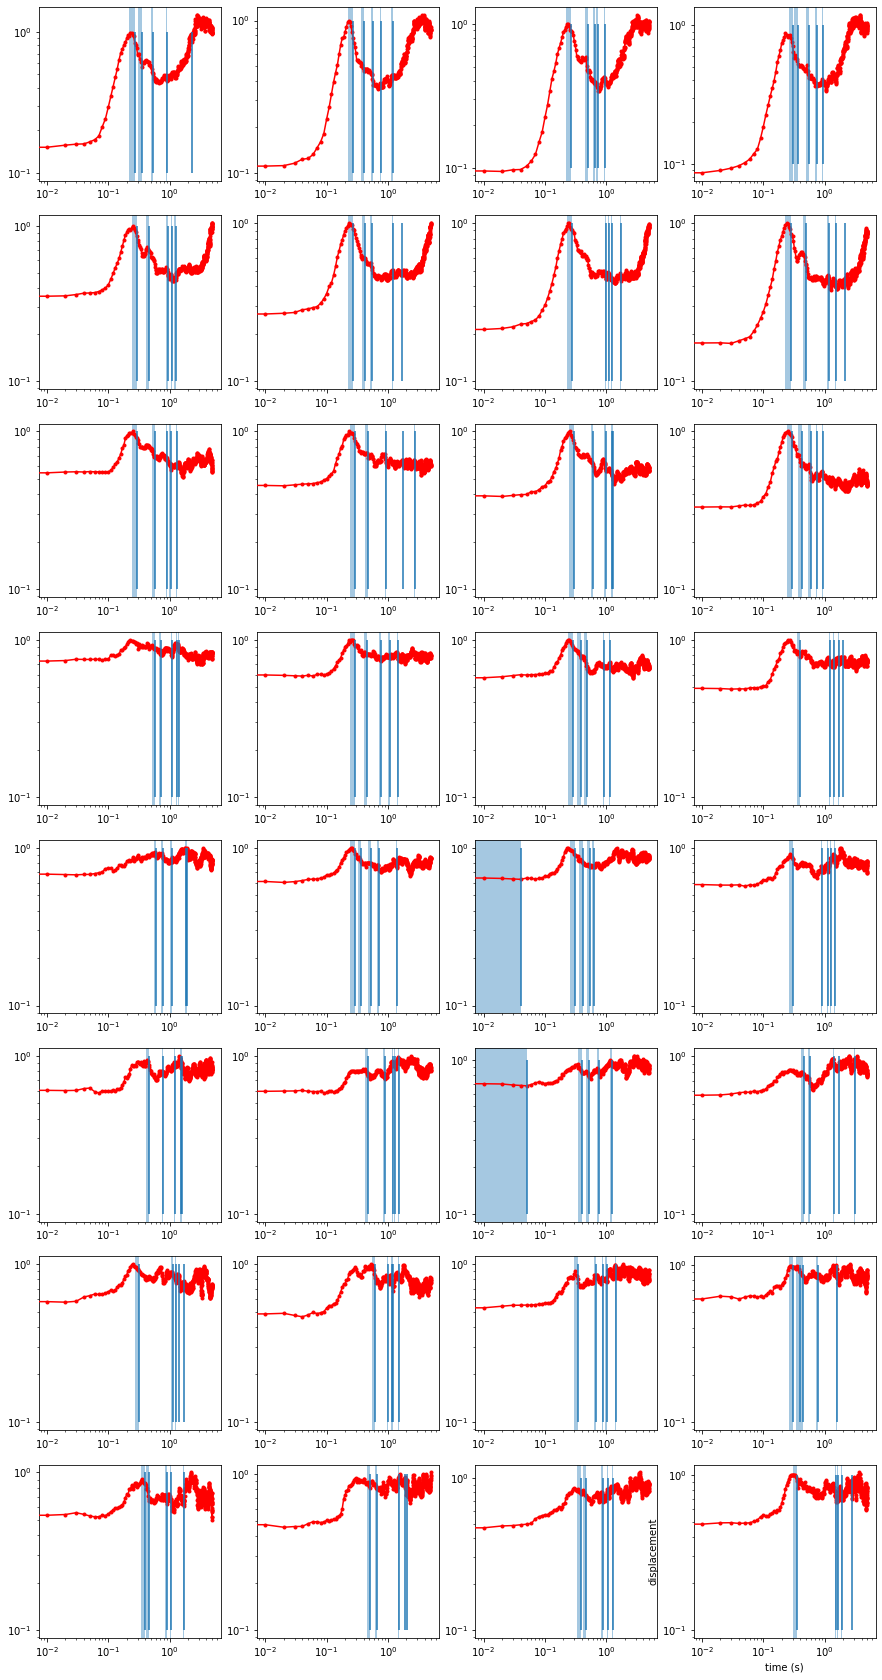

In [58]:
fig, axs = plt.subplots(8, len(, figsize = (15,30)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:4]:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        if len(ad[column][row])>0:
            aad[column][row]=np.median(np.array(ad[column][row]), 0)
            aad_bin = aad[column][row]
            # now to find where departure delay exceeds DPD
            # 'simple sequential computation ... comparing the amplitude at a sample
            # with the one at the previous sample ...regardless of the magntiude of the decline'
            # Noda and Ellsworth 2016
            DPD_time = 0.05
            DPD_samples = 5 # sampling rate is 100 Hz
            delay_time = []
            decline = 0 # count how many amplitudes have decreased in a row
            for point in range(1,len(aad_bin)):
                #print('for point in aad')
                if aad_bin[point]<aad_bin[point-1]:
                    #print('less than previous point')
                    decline = decline + 1
                    if decline == 4:#np.ceil(DPD_samples)-1: #if surpassed the DPD
                        delay_time.append(point)
                else:
                    decline = 0 #reset decline counter
            T_dp = np.array(delay_time)/sampling_rate # convert to seconds
            if len(T_dp)>0:
                print(T_dp[0:5])
                for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                    #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                    axs[row_count][col_count].vlines(T_dp[i], 0.1, 1, zorder = 100)
                    axs[row_count][col_count].axvspan(T_dp[i]-0.05, T_dp[i], alpha = 0.4)
                if float("{:.2f}".format(T_dp[0]))>0.2:
                    print(column, row_count, T_dp[0], counts[column][row])
                    results[row].append([column, row_count, T_dp[0], counts[column][row]])
                elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                    print(column, row_count, T_dp[1], counts[column][row])
                    results[row].append([column, row_count, T_dp[1], counts[column][row]])
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red')
            axs[row_count][col_count].scatter(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red', marker = '.')
            #axs[row_count][col_count].set_xlim(T_dp[0], T_dp[5])
            #axs[row_count][col_count].set_ylim(0.1, 2)
            axs[row_count][col_count].set_xscale('log')
            axs[row_count][col_count].set_yscale('log') # in log space
            col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [234]:
results 

[[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17],
  ['5.4', 0, 0.20999999999999999, 14],
  ['5.5', 0, 1.1799999999999999, 16],
  ['5.6', 0, 0.35999999999999999, 15],
  ['5.8', 0, 0.27000000000000002, 14],
  ['6.0', 0, 0.68999999999999995, 2],
  ['6.4', 0, 1.24, 3]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37],
  ['5.4', 1, 0.48999999999999999, 16],
  ['5.5', 1, 0.65000000000000002, 35],
  ['5.6', 1, 1.4299999999999999, 37],
  ['5.7', 1, 0.64000000000000001, 37],
  ['5.8', 1, 0.44, 34],
  ['5.9', 1, 0.69999999999999996, 34],
  ['6.0', 1, 0.83999999999999997, 2],
  ['6.1', 1, 1.53, 2],
  ['6.2', 1, 1.22, 2],
  ['6.4', 1, 0.88, 1]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52],
  ['5.4', 2, 0.41999999999999998, 51],
  ['5.5', 2, 

In [145]:
results_snr_100 = [[['5.0', 0, 0.58999999999999997, 12],
  ['5.1', 0, 1.05, 13],
  ['5.2', 0, 0.29999999999999999, 12],
  ['5.3', 0, 0.39000000000000001, 12],
  ['5.4', 0, 0.51000000000000001, 10],
  ['5.5', 0, 1.24, 11],
  ['5.6', 0, 0.62, 11],
  ['6.0', 0, 0.40000000000000002, 1]],
 [['5.0', 1, 0.29999999999999999, 21],
  ['5.1', 1, 0.56999999999999995, 22],
  ['5.2', 1, 0.40999999999999998, 22],
  ['5.3', 1, 0.52000000000000002, 22],
  ['5.4', 1, 0.20999999999999999, 6],
  ['5.5', 1, 0.81999999999999995, 21],
  ['5.6', 1, 0.29999999999999999, 22],
  ['5.7', 1, 0.28000000000000003, 22],
  ['5.8', 1, 0.44, 20],
  ['5.9', 1, 0.98999999999999999, 20],
  ['6.0', 1, 0.60999999999999999, 1],
  ['6.1', 1, 1.53, 2],
  ['6.4', 1, 0.82999999999999996, 1]],
 [['5.0', 2, 0.41999999999999998, 29],
  ['5.1', 2, 0.76000000000000001, 30],
  ['5.2', 2, 0.60999999999999999, 29],
  ['5.3', 2, 0.75, 28],
  ['5.4', 2, 0.45000000000000001, 29],
  ['5.5', 2, 0.84999999999999998, 29],
  ['5.6', 2, 0.46999999999999997, 27],
  ['5.7', 2, 0.63, 30],
  ['5.8', 2, 0.48999999999999999, 27],
  ['5.9', 2, 0.45000000000000001, 22],
  ['6.0', 2, 0.91000000000000003, 4],
  ['6.3', 2, 0.47999999999999998, 1],
  ['6.4', 2, 0.94999999999999996, 5]],
 [['5.0', 3, 0.56000000000000005, 27],
  ['5.1', 3, 0.87, 28],
  ['5.2', 3, 0.41999999999999998, 26],
  ['5.3', 3, 0.31, 26],
  ['5.4', 3, 0.37, 22],
  ['5.5', 3, 0.44, 24],
  ['5.6', 3, 0.70999999999999996, 27],
  ['5.7', 3, 0.71999999999999997, 26],
  ['5.8', 3, 0.71999999999999997, 24],
  ['5.9', 3, 0.69999999999999996, 14],
  ['6.0', 3, 0.58999999999999997, 2],
  ['6.2', 3, 0.81999999999999995, 2],
  ['6.3', 3, 0.46000000000000002, 2],
  ['6.4', 3, 0.69999999999999996, 2],
  ['7.0', 3, 0.96999999999999997, 1]],
 [['5.0', 4, 0.63, 28],
  ['5.1', 4, 0.44, 29],
  ['5.2', 4, 0.46999999999999997, 29],
  ['5.3', 4, 0.89000000000000001, 29],
  ['5.4', 4, 0.35999999999999999, 25],
  ['5.5', 4, 0.76000000000000001, 29],
  ['5.6', 4, 0.68999999999999995, 29],
  ['5.7', 4, 0.29999999999999999, 29],
  ['5.8', 4, 0.80000000000000004, 29],
  ['5.9', 4, 0.23000000000000001, 29],
  ['6.0', 4, 0.47999999999999998, 8],
  ['6.2', 4, 0.54000000000000004, 9],
  ['6.4', 4, 0.69999999999999996, 2],
  ['6.6', 4, 0.81999999999999995, 1]],
 [['5.0', 5, 0.65000000000000002, 27],
  ['5.1', 5, 0.65000000000000002, 28],
  ['5.2', 5, 0.47999999999999998, 26],
  ['5.3', 5, 0.40000000000000002, 27],
  ['5.4', 5, 0.45000000000000001, 25],
  ['5.5', 5, 0.91000000000000003, 23],
  ['5.6', 5, 0.60999999999999999, 23],
  ['5.7', 5, 0.57999999999999996, 28],
  ['5.8', 5, 0.81000000000000005, 23],
  ['6.0', 5, 0.55000000000000004, 6],
  ['6.1', 5, 0.93999999999999995, 4],
  ['6.2', 5, 0.63, 7],
  ['6.4', 5, 0.96999999999999997, 1],
  ['6.5', 5, 0.57999999999999996, 2]],
 [['5.0', 6, 0.46000000000000002, 15],
  ['5.1', 6, 0.51000000000000001, 16],
  ['5.2', 6, 0.41999999999999998, 16],
  ['5.3', 6, 0.51000000000000001, 16],
  ['5.4', 6, 0.67000000000000004, 9],
  ['5.5', 6, 0.42999999999999999, 13],
  ['5.6', 6, 0.98999999999999999, 16],
  ['5.7', 6, 0.52000000000000002, 16],
  ['5.8', 6, 0.93999999999999995, 13],
  ['6.0', 6, 0.70999999999999996, 2],
  ['6.1', 6, 0.89000000000000001, 1]],
 [['5.0', 7, 0.56000000000000005, 2],
  ['5.1', 7, 0.87, 3],
  ['5.2', 7, 0.5, 3],
  ['5.3', 7, 0.40999999999999998, 1],
  ['5.4', 7, 0.5, 3],
  ['5.5', 7, 1.3200000000000001, 3],
  ['5.7', 7, 0.84999999999999998, 3],
  ['6.1', 7, 0.54000000000000004, 1]]]

In [5]:
results_snr_10 =  [[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17],
  ['5.4', 0, 0.20999999999999999, 14],
  ['5.5', 0, 1.1799999999999999, 16],
  ['5.6', 0, 0.35999999999999999, 15],
  ['5.8', 0, 0.27000000000000002, 14],
  ['6.0', 0, 0.68999999999999995, 2],
  ['6.4', 0, 1.24, 3]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37],
  ['5.4', 1, 0.48999999999999999, 16],
  ['5.5', 1, 0.65000000000000002, 35],
  ['5.6', 1, 1.4299999999999999, 37],
  ['5.7', 1, 0.64000000000000001, 37],
  ['5.8', 1, 0.44, 34],
  ['5.9', 1, 0.69999999999999996, 34],
  ['6.0', 1, 0.83999999999999997, 2],
  ['6.1', 1, 1.53, 2],
  ['6.2', 1, 1.22, 2],
  ['6.4', 1, 0.88, 1]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52],
  ['5.4', 2, 0.41999999999999998, 51],
  ['5.5', 2, 0.37, 51],
  ['5.6', 2, 1.05, 51],
  ['5.7', 2, 0.54000000000000004, 52],
  ['5.8', 2, 0.5, 48],
  ['5.9', 2, 0.39000000000000001, 41],
  ['6.0', 2, 0.39000000000000001, 5],
  ['6.2', 2, 0.59999999999999998, 6],
  ['6.3', 2, 0.29999999999999999, 3],
  ['6.4', 2, 0.82999999999999996, 6],
  ['6.9', 2, 0.29999999999999999, 4]],
 [['5.0', 3, 0.54000000000000004, 60],
  ['5.1', 3, 0.63, 61],
  ['5.2', 3, 0.73999999999999999, 58],
  ['5.3', 3, 1.03, 61],
  ['5.4', 3, 0.34999999999999998, 48],
  ['5.5', 3, 0.87, 55],
  ['5.6', 3, 0.56000000000000005, 60],
  ['5.7', 3, 0.80000000000000004, 58],
  ['5.8', 3, 0.72999999999999998, 49],
  ['5.9', 3, 0.69999999999999996, 26],
  ['6.0', 3, 0.58999999999999997, 2],
  ['6.1', 3, 0.46999999999999997, 2],
  ['6.2', 3, 0.81999999999999995, 2],
  ['6.3', 3, 0.46000000000000002, 2],
  ['6.4', 3, 0.72999999999999998, 2],
  ['7.0', 3, 0.96999999999999997, 1]],
 [['5.0', 4, 0.55000000000000004, 93],
  ['5.1', 4, 0.59999999999999998, 94],
  ['5.2', 4, 0.68000000000000005, 91],
  ['5.3', 4, 0.56000000000000005, 91],
  ['5.4', 4, 0.75, 91],
  ['5.5', 4, 0.67000000000000004, 87],
  ['5.6', 4, 0.69999999999999996, 91],
  ['5.7', 4, 0.34999999999999998, 94],
  ['5.8', 4, 0.65000000000000002, 91],
  ['5.9', 4, 0.23000000000000001, 93],
  ['6.0', 4, 0.52000000000000002, 17],
  ['6.1', 4, 0.45000000000000001, 4],
  ['6.2', 4, 0.63, 18],
  ['6.3', 4, 0.55000000000000004, 4],
  ['6.4', 4, 1.03, 2],
  ['6.5', 4, 1.1299999999999999, 2],
  ['6.6', 4, 0.81999999999999995, 1]],
 [['5.0', 5, 0.69999999999999996, 67],
  ['5.1', 5, 0.68999999999999995, 68],
  ['5.2', 5, 0.48999999999999999, 60],
  ['5.3', 5, 0.78000000000000003, 68],
  ['5.4', 5, 0.78000000000000003, 49],
  ['5.5', 5, 0.97999999999999998, 49],
  ['5.6', 5, 0.59999999999999998, 61],
  ['5.7', 5, 0.62, 68],
  ['5.8', 5, 0.66000000000000003, 49],
  ['6.0', 5, 0.34999999999999998, 15],
  ['6.1', 5, 0.64000000000000001, 8],
  ['6.2', 5, 0.63, 16],
  ['6.4', 5, 0.73999999999999999, 6],
  ['6.5', 5, 0.56999999999999995, 6]],
 [['5.0', 6, 0.22, 45],
  ['5.1', 6, 0.44, 46],
  ['5.2', 6, 0.71999999999999997, 44],
  ['5.3', 6, 0.42999999999999999, 46],
  ['5.4', 6, 0.59999999999999998, 25],
  ['5.5', 6, 0.26000000000000001, 44],
  ['5.6', 6, 0.60999999999999999, 46],
  ['5.7', 6, 0.53000000000000003, 46],
  ['5.8', 6, 1.0700000000000001, 32],
  ['6.0', 6, 0.64000000000000001, 3],
  ['6.1', 6, 0.89000000000000001, 1],
  ['6.2', 6, 0.71999999999999997, 4],
  ['6.3', 6, 0.65000000000000002, 4]],
 [['5.0', 7, 0.52000000000000002, 13],
  ['5.1', 7, 0.38, 14],
  ['5.2', 7, 0.56999999999999995, 14],
  ['5.3', 7, 0.40999999999999998, 4],
  ['5.4', 7, 0.5, 13],
  ['5.5', 7, 0.85999999999999999, 12],
  ['5.6', 7, 0.56000000000000005, 12],
  ['5.7', 7, 0.89000000000000001, 12],
  ['5.8', 7, 0.48999999999999999, 10],
  ['6.1', 7, 0.54000000000000004, 1],
  ['6.2', 7, 0.73999999999999999, 1]]]

In [6]:
mags_plot_10 = []
dist_plot_10 = []
dt_plot_10 = []
n_plot_10 = []
for k in results_snr_10:
    for l in k:
        mags_plot_10.append(float(l[0]))
        dist_plot_10.append(l[1])
        dt_plot_10.append(l[2])
        n_plot_10.append(l[3])

In [147]:
mags_plot_100 = []
dist_plot_100 = []
dt_plot_100 = []
n_plot_100 = []
for k in results:
    for l in k:
        mags_plot_100.append(float(l[0]))
        dist_plot_100.append(l[1])
        dt_plot_100.append(l[2])
        n_plot_100.append(l[3])

In [103]:
results

array(['3.0', '0', '0.27', ..., '7', '0.62', '1'], dtype='<U32')

In [102]:
results

array(['3.0', '0', '0.27', ..., '7', '0.62', '1'], dtype='<U32')

In [176]:
 results = results_snr_100

In [170]:
results = np.concatenate(results)
df1 = pd.DataFrame({'mag':[], 'dist':[],'delaytime':[],'n':[]})

In [179]:
results

array([['5.0', '0', '0.59', '12'],
       ['5.1', '0', '1.05', '13'],
       ['5.2', '0', '0.3', '12'],
       ['5.3', '0', '0.39', '12'],
       ['5.4', '0', '0.51', '10'],
       ['5.5', '0', '1.24', '11'],
       ['5.6', '0', '0.62', '11'],
       ['6.0', '0', '0.4', '1'],
       ['5.0', '1', '0.3', '21'],
       ['5.1', '1', '0.57', '22'],
       ['5.2', '1', '0.41', '22'],
       ['5.3', '1', '0.52', '22'],
       ['5.4', '1', '0.21', '6'],
       ['5.5', '1', '0.82', '21'],
       ['5.6', '1', '0.3', '22'],
       ['5.7', '1', '0.28', '22'],
       ['5.8', '1', '0.44', '20'],
       ['5.9', '1', '0.99', '20'],
       ['6.0', '1', '0.61', '1'],
       ['6.1', '1', '1.53', '2'],
       ['6.4', '1', '0.83', '1'],
       ['5.0', '2', '0.42', '29'],
       ['5.1', '2', '0.76', '30'],
       ['5.2', '2', '0.61', '29'],
       ['5.3', '2', '0.75', '28'],
       ['5.4', '2', '0.45', '29'],
       ['5.5', '2', '0.85', '29'],
       ['5.6', '2', '0.47', '27'],
       ['5.7', '2', '0.63', '

In [178]:
results = np.concatenate(results)

In [180]:
results[0][0]

'5.0'

In [166]:
dicti = {'mag':results[0][0], 'dist':float(results[0][1]),'delaytime':float(results[0][2]),'n':float(results[0][3])}

In [194]:
len(results)

96

In [198]:
df1 = pd.DataFrame({'mag':results[0][0], 'dist':float(results[0][1]),'delaytime':float(results[0][2]),'n':float(results[0][3])}, index=[0])
for i in range(1, len(results)):
    df2 = pd.DataFrame({'mag':results[i][0], 'dist':float(results[i][1]),'delaytime':float(results[i][2]),'n':float(results[i][3])}, index=[0])
    df1 = df1.append(df2)
    print(df3)


   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  dist  delaytime     n
0  5.0   0.0       0.59  12.0
0  6.1   7.0       0.54   1.0
   mag  di

/tmp/ipykernel_1954508/3399802518.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_1954508/3399802518.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_1954508/3399802518.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_1954508/3399802518.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_1954508/3399802518.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2)
/tmp/ipykernel_

In [182]:
df1, df2

(   mag  dist  delaytime     n
 0  5.0   0.0       0.59  12.0,
    mag  dist  delaytime     n
 0  5.1   0.0       1.05  13.0)

In [199]:
df1

,mag,dist,delaytime,n
0,5.0,0.0,0.59,12.0
0,5.1,0.0,1.05,13.0
0,5.2,0.0,0.30,12.0
0,5.3,0.0,0.39,12.0
0,5.4,0.0,0.51,10.0
...,...,...,...,...
0,5.3,7.0,0.41,1.0
0,5.4,7.0,0.50,3.0
0,5.5,7.0,1.32,3.0
0,5.7,7.0,0.85,3.0


In [200]:
df3 = df1.sort_values('n')


In [201]:
df3

,mag,dist,delaytime,n
0,6.1,7.0,0.54,1.0
0,6.4,1.0,0.83,1.0
0,6.3,2.0,0.48,1.0
0,7.0,3.0,0.97,1.0
0,6.0,0.0,0.40,1.0
...,...,...,...,...
0,5.5,4.0,0.76,29.0
0,5.3,4.0,0.89,29.0
0,5.8,4.0,0.80,29.0
0,5.1,2.0,0.76,30.0


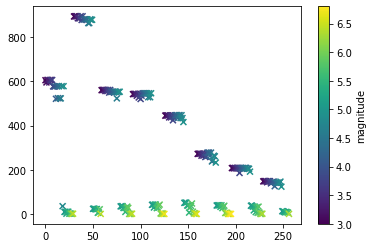

In [78]:
plt.scatter(np.arange(0, len(n_plot_100)), n_plot_100, c=mags_plot_100, marker = 'x')
plt.colorbar(label='magnitude')

In [79]:
from cmcrameri import cm

In [203]:
df3['mag']

0    6.1
0    6.4
0    6.3
0    7.0
0    6.0
    ... 
0    5.5
0    5.3
0    5.8
0    5.1
0    5.7
Name: mag, Length: 96, dtype: object

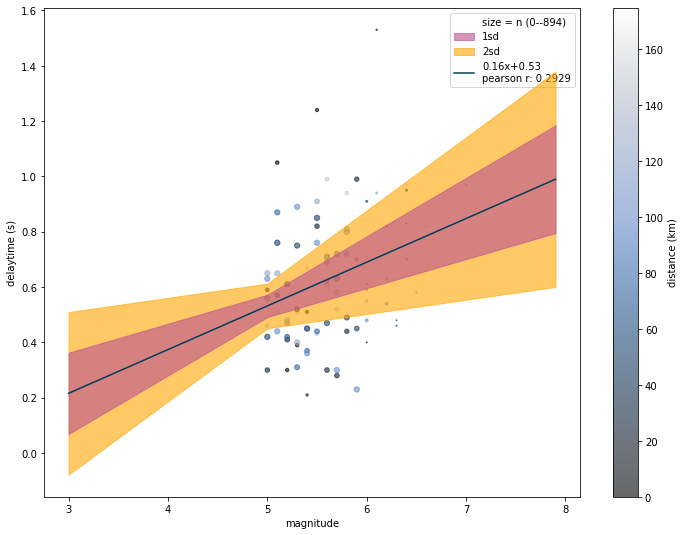

In [208]:
plt.scatter(np.array(df3['mag']).astype(float), np.array(df3['delaytime']).astype(float), marker = 'o', alpha = 0.6, s = np.array(df3['n']).astype(float),label = 'size = n (0--894)',c = np.array(df3['dist']).astype(float)*25, cmap=cm.oslo)
#plt.scatter(mags_plot_10, dt_plot_10, marker = 'o', alpha = 0.6, label = 'snr >10') #c = dist_plot_10, 

x = np.array(mags_plot_100)-5
y = np.array(dt_plot_100)
x_unique = np.arange(-2,3,0.1)
result = scipy.stats.linregress(x,y)
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
plt.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
plt.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
popt = np.polyfit(x, y, 1)
plt.plot(x_unique+5, a*(x_unique)+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept,r=result.rvalue))
plt.colorbar(label='distance (km)')        
plt.legend()
plt.ylabel('delaytime (s)')
plt.xlabel('magnitude')
fig = plt.gcf()
fig.set_size_inches(12,9)

In [64]:
pl.cm.jet(np.linspace(5.0,7.0,21))

array([[ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ]])

onto row/column plot


/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_6657/4025810559.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad

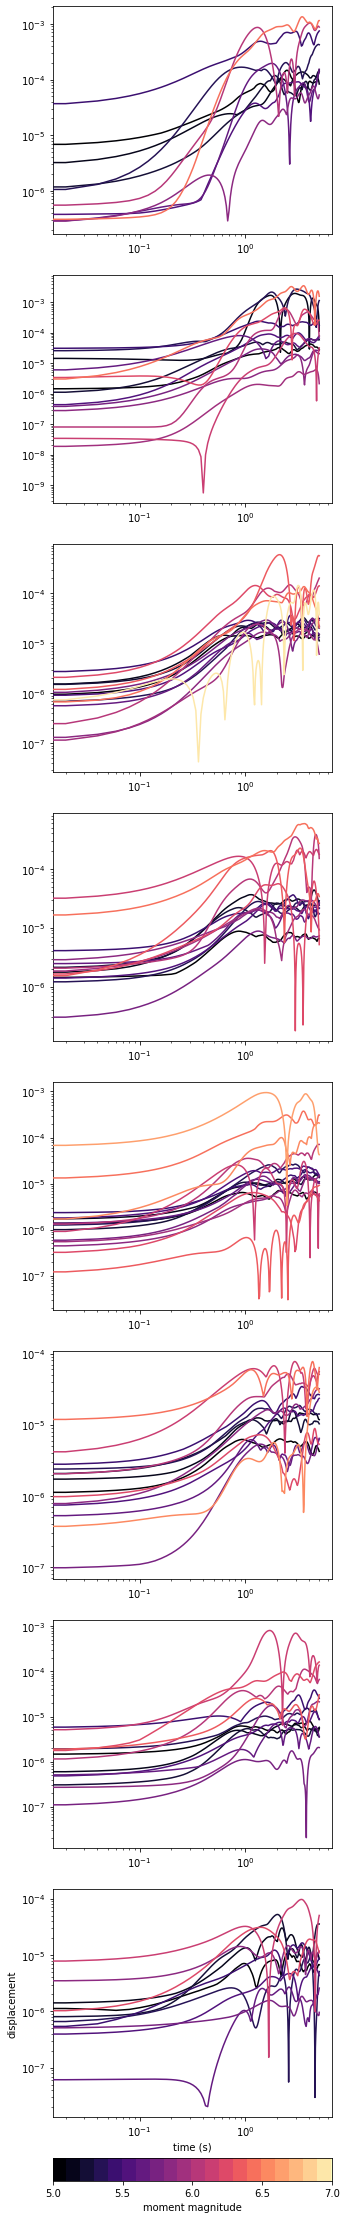

In [167]:
fig, axs = plt.subplots(9, 1, figsize=(5, 40), gridspec_kw={'height_ratios': [5,5,5,5,5,5,5,5, 0.5]})

import matplotlib.patches as mpatches
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
import matplotlib.pylab as pl
colors = pl.cm.magma(np.linspace(0,1,21))
#cmap = pl.cm.get_cmap('magma', 21)  
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:#columns are magnitudes
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            #print(T_dp[0:5])
            #for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
            #    axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                #print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                #print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = colors[col_count])
        #for ind_ad in ad[column][row]:
        #    axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count].set_xscale('log')
        axs[row_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1

    axs[r].set_ylabel('displacement')
axs[r].set_xlabel('time (s)')

left = 5
axs[8].set_ylim([0,1])
axs[8].set_xlim([5,7])
for c in range(0, 21):
    rect=mpatches.Rectangle((left,0),0.1,1, fill=True,color=colors[c],linewidth=2,facecolor=colors[c])
    axs[8].add_patch(rect)
    left += 0.1
axs[8].set_xlabel('moment magnitude')
axs[8].set_xticks(np.arange(5,7.1,0.5))
axs[8].set_yticks([])
#cax = axs[8].add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
#fig.colorbar(colors, cax=axs[8], orientation='horizontal')
#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')

plt.show()

In [24]:
results[1]

[['5.0', 1, 0.51000000000000001, 54],
 ['5.1', 1, 0.90000000000000002, 55],
 ['5.2', 1, 0.22, 53],
 ['5.3', 1, 0.92000000000000004, 55],
 ['5.4', 1, 0.68999999999999995, 47],
 ['5.5', 1, 0.75, 52],
 ['5.6', 1, 0.29999999999999999, 55],
 ['5.7', 1, 1.02, 55],
 ['5.8', 1, 1.6000000000000001, 52],
 ['5.9', 1, 0.68000000000000005, 51],
 ['6.0', 1, 1.24, 5],
 ['6.1', 1, 1.05, 2],
 ['6.2', 1, 0.59999999999999998, 6],
 ['6.3', 1, 0.63, 2],
 ['6.4', 1, 0.91000000000000003, 1]]

In [10]:
#%%script false --no-raise-error
results = [['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.42999999999999999, 66],
 ['5.5', 2, 0.55000000000000004, 8],
 ['5.6', 2, 0.59999999999999998, 45],
 ['5.8', 2, 0.52000000000000002, 42],
 ['5.9', 2, 0.58999999999999997, 44],
 ['6.0', 2, 1.3600000000000001, 7],
 ['6.1', 2, 0.56999999999999995, 7],
 ['6.3', 2, 1.1000000000000001, 1],
 ['6.4', 2, 1.8100000000000001, 8],
 ['6.6', 2, 0.94999999999999996, 1],
 ['5.0', 3, 0.47999999999999998, 66],
 ['5.1', 3, 0.56999999999999995, 67],
 ['5.2', 3, 0.68999999999999995, 53],
 ['5.3', 3, 0.56000000000000005, 67],
 ['5.4', 3, 0.54000000000000004, 67],
 ['5.5', 3, 0.56999999999999995, 36],
 ['5.6', 3, 0.76000000000000001, 38],
 ['5.7', 3, 0.63, 53],
 ['5.8', 3, 0.70999999999999996, 28],
 ['5.9', 3, 0.20999999999999999, 53],
 ['6.0', 3, 1.23, 10],
 ['6.1', 3, 1.05, 9],
 ['6.3', 3, 0.56000000000000005, 9],
 ['6.4', 3, 1.1599999999999999, 11],
 ['6.6', 3, 0.68000000000000005, 1],
 ['6.7', 3, 1.1299999999999999, 2],
 ['6.8', 3, 0.35999999999999999, 11],
 ['5.0', 4, 0.56000000000000005, 56],
 ['5.1', 4, 0.42999999999999999, 56],
 ['5.2', 4, 0.68000000000000005, 21],
 ['5.3', 4, 0.48999999999999999, 56],
 ['5.4', 4, 0.46999999999999997, 56],
 ['5.5', 4, 0.46000000000000002, 4],
 ['5.6', 4, 0.58999999999999997, 38],
 ['5.7', 4, 0.57999999999999996, 4],
 ['5.8', 4, 0.63, 36],
 ['5.9', 4, 0.56000000000000005, 25],
 ['6.0', 4, 1.22, 5],
 ['6.3', 4, 0.65000000000000002, 5],
 ['6.4', 4, 1.29, 6],
 ['6.6', 4, 0.35999999999999999, 1],
 ['6.7', 4, 0.72999999999999998, 1],
 ['6.8', 4, 1.3200000000000001, 6],
 ['5.0', 5, 0.59999999999999998, 9],
 ['5.1', 5, 0.60999999999999999, 10],
 ['5.2', 5, 0.77000000000000002, 10],
 ['5.3', 5, 0.78000000000000003, 10],
 ['5.4', 5, 0.42999999999999999, 10],
 ['5.6', 5, 0.75, 1],
 ['5.7', 5, 0.56000000000000005, 10],
 ['6.0', 5, 0.67000000000000004, 5],
 ['6.3', 5, 0.69999999999999996, 6],
 ['5.0', 6, 0.60999999999999999, 9],
 ['5.1', 6, 0.73999999999999999, 9],
 ['5.2', 6, 0.95999999999999996, 9],
 ['5.3', 6, 0.39000000000000001, 5],
 ['5.4', 6, 0.62, 10],
 ['5.0', 7, 0.62, 10],
 ['5.2', 7, 0.54000000000000004, 10],
 ['5.3', 7, 0.77000000000000002, 11],
 ['5.4', 7, 0.46999999999999997, 9]]

In [3]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [18]:
results

[['5.0', 0, 0.32, 23],
 ['5.1', 0, 0.59, 24],
 ['5.2', 0, 0.36, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.73, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92, 2],
 ['6.0', 0, 0.56, 2],
 ['6.1', 0, 1.57, 2],
 ['6.4', 0, 1.36, 3],
 ['5.0', 1, 0.52, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.57, 31],
 ['5.3', 1, 0.76, 31],
 ['5.4', 1, 0.7, 50],
 ['5.5', 1, 0.3, 6],
 ['5.6', 1, 0.47, 7],
 ['5.7', 1, 0.52, 6],
 ['5.8', 1, 0.97, 30],
 ['5.9', 1, 1.08, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64, 1],
 ['6.4', 1, 0.91, 3],
 ['6.8', 1, 1.19, 3],
 ['5.0', 2, 0.49, 65],
 ['5.1', 2, 0.45, 66],
 ['5.2', 2, 0.42, 32],
 ['5.3', 2, 0.54, 44],
 ['5.4', 2, 0.43, 66],
 ['5.5', 2, 0.55, 8],
 ['5.6', 2, 0.6, 45],
 ['5.8', 2, 0.52, 42],
 ['5.9', 2, 0.59, 44],
 ['6.0', 2, 1.36, 7],
 ['6.1', 2, 0.57, 7],
 ['6.3', 2, 1.1, 1],
 ['6.4', 2, 1.81, 8],
 ['6.6', 2, 0.95, 1],
 ['5.0', 3, 0.48, 66],
 ['5.1', 3, 0.57, 67],
 ['5.2', 3, 0.69, 53],
 ['5.3', 3, 0.56, 67],
 ['5.4', 3, 0.54, 67],
 ['5.5', 3, 0.57, 36],
 ['5.6', 3, 0

In [17]:
results_concat

array([['5.0', '0', '0.73', '10'],
       ['5.1', '0', '0.44', '11'],
       ['5.2', '0', '0.43', '11'],
       ['5.3', '0', '0.44', '10'],
       ['5.4', '0', '0.73', '2'],
       ['5.6', '0', '0.93', '2'],
       ['6.0', '0', '0.4', '1'],
       ['5.0', '1', '0.6', '14'],
       ['5.1', '1', '0.46', '15'],
       ['5.2', '1', '0.38', '15'],
       ['5.3', '1', '0.55', '5'],
       ['5.4', '1', '0.8', '5'],
       ['5.5', '1', '0.79', '15'],
       ['5.7', '1', '0.65', '15'],
       ['5.8', '1', '0.44', '15'],
       ['6.0', '1', '0.61', '1'],
       ['6.4', '1', '0.83', '1'],
       ['5.0', '2', '0.61', '20'],
       ['5.1', '2', '0.33', '21'],
       ['5.2', '2', '0.46', '21'],
       ['5.3', '2', '0.36', '21'],
       ['5.4', '2', '0.57', '20'],
       ['5.5', '2', '0.58', '21'],
       ['5.6', '2', '0.58', '21'],
       ['5.7', '2', '0.87', '21'],
       ['5.8', '2', '0.78', '21'],
       ['6.0', '2', '1.44', '1'],
       ['6.2', '2', '0.66', '1'],
       ['6.3', '2', '1.09', '1']

In [29]:
all_mag = []
n = []
tdp_all = []
results_concat = []
#for i in results:
results_concat = np.concatenate(results)
for i in results_concat:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
    n.append(float(i[3]))
y = all_mag
x = tdp_all    
x = np.array(x)

In [14]:
results_concat

array(['5.0', '0', '0.32', '23', '5.1', '0', '0.59', '24', '5.2', '0',
       '0.36', '2', '5.3', '0', '0.5', '11', '5.4', '0', '0.73', '24',
       '5.5', '0', '0.62', '2', '5.6', '0', '0.92', '2', '6.0', '0',
       '0.56', '2', '6.1', '0', '1.57', '2', '6.4', '0', '1.36', '3',
       '5.0', '1', '0.52', '50', '5.1', '1', '0.37', '50', '5.2', '1',
       '0.57', '31', '5.3', '1', '0.76', '31', '5.4', '1', '0.7', '50',
       '5.5', '1', '0.3', '6', '5.6', '1', '0.47', '7', '5.7', '1', '0.52',
       '6', '5.8', '1', '0.97', '30', '5.9', '1', '1.08', '31', '6.0', '1',
       '0.5', '2', '6.2', '1', '0.64', '1', '6.4', '1', '0.91', '3', '6.8',
       '1', '1.19', '3', '5.0', '2', '0.49', '65', '5.1', '2', '0.45',
       '66', '5.2', '2', '0.42', '32', '5.3', '2', '0.54', '44', '5.4',
       '2', '0.43', '66', '5.5', '2', '0.55', '8', '5.6', '2', '0.6', '45',
       '5.8', '2', '0.52', '42', '5.9', '2', '0.59', '44', '6.0', '2',
       '1.36', '7', '6.1', '2', '0.57', '7', '6.3', '2', '

In [ ]:
initial_guess = (1.5, 6)

In [ ]:
def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

def obj_flipped(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    t_guess = (a*m_real+b)
    return sum(abs(t_guess-t))

In [ ]:
res = optimize.minimize(obj, initial_guess, method = 'Nelder-Mead')

In [ ]:
res

In [ ]:
a = 2.29
b = 5.95
m_real = np.array(all_mag)
t = np.log10(np.array(tdp_all))
m_guess = (a*t+b)
sum(abs(m_guess-m_real))

BOOTSTRAPPING -- np.polyfit

In [ ]:
import random 
def bootstrapping_function():
    m_all = np.array(all_mag)
    t_all = np.array(tdp_all)
    t_BS = []
    m_BS = []
    for count in range(0,len(t_all)):
        #print(count)
        i = random.randrange(0,len(t_all))
        t_BS.append(t_all[i])
        m_BS.append(m_all[i])
    print(t_BS[0], m_BS[0])
    return m_BS, t_BS

In [ ]:
def obj_BS_1(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    #print(m_real[0], t[0])
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_BS_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

In [ ]:
gradt = []
intercepts = []
gradt_2 = []
intercepts_2 = []
gradt_polyfit = []
intercepts_polyfit = []
for bs in range(0, 1000):
    print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    m_BS, t_BS = bootstrapping_function()
    res = optimize.minimize(obj_BS_1, initial_guess, method = 'TNC')
    gradt.append(res.x[0])
    intercepts.append(res.x[1])
    #print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    res = optimize.minimize(obj_BS_2, initial_guess, method = 'TNC')
    gradt_2.append(res.x[0])
    intercepts_2.append(res.x[1])  
    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
    gradt_polyfit.append(a)
    intercepts_polyfit.append(b)    

In [ ]:

#for bs in range(0, 100):
#    print('bootstrapping run'+str(bs))
#    m_BS, t_BS = bootstrapping_function()
#    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
#    gradt_polyfit.append(a)
#    intercepts_polyfit.append(b)

In [ ]:
min(intercepts), max(intercepts)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
i_bins = list(np.arange(5,6.5, 0.02))
g_bins = list(np.arange(-2, 3,0.1))

res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
res_3 = optimize.minimize(obj, initial_guess, method = 'TNC')
res_2 = optimize.minimize(obj_2, initial_guess, method = 'nelder-mead')

intercepts.sort()
intercepts_2.sort()
n, bins, patches = axs[0].hist(intercepts, bins = i_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)
axs[0].hist(intercepts_2, bins = i_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
#axs[0].hist(intercepts_polyfit, bins = i_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[0].vlines(res.x[1], 0, 200, color = 'tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[0].vlines(res_3.x[1], 0, 200, color = 'tab:green', label = 'TNC optimize.minimize all data, 1-norm')
axs[0].vlines(res_2.x[1], 0, 200, color = 'tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[0].vlines(5.95, 0, 200, color = 'k', label = 'published')
axs[0].vlines(intercepts[25], 0, 200, linestyle = ':')
axs[0].vlines(intercepts[975], 0, 200, linestyle = ':')
axs[0].vlines(intercepts_2[25], 0, 200, linestyle = ':', color = 'orange')
axs[0].vlines(intercepts_2[975], 0, 200, linestyle = ':', color = 'orange')

gradt.sort()
gradt_2.sort()
axs[1].vlines(res.x[0], 0 , 200, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[1].vlines(res_2.x[0], 0 , 200, color='tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[1].vlines(res_3.x[0], 0 , 200, color='tab:green', label = 'TNC optimize.minimize all data, 2-norm')
axs[1].vlines(2.29, 0 , 200, color = 'k', label = 'published')
axs[1].vlines(gradt[25], 0 , 200, linestyle = ':')
axs[1].vlines(gradt[975], 0 , 200, linestyle = ':')
axs[1].vlines(gradt_2[25], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].vlines(gradt_2[975], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].hist(gradt, bins = g_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
axs[1].hist(gradt_2, bins = g_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)

axs[0].set_title('intercepts')
axs[0].ticklabel_format(useOffset=False)
axs[0].ticklabel_format(useOffset=False)
#axs[1].hist(gradt_polyfit, bins = g_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[1].set_title('gradients')
axs[1].ticklabel_format(useOffset=False)
axs[1].ticklabel_format(useOffset=False)
axs[0].legend()
axs[1].legend()

In [ ]:
max(gradt)

In [ ]:
intercepts[25]

In [42]:
q = 0
for i in results:
    for j in i:
        q = q+j[-1]


In [43]:
q

3594

0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.771754702869 5.74264578186
1.04339551807 5.90723875357
 final_simplex: (array([[ 1.04339552,  5.907238

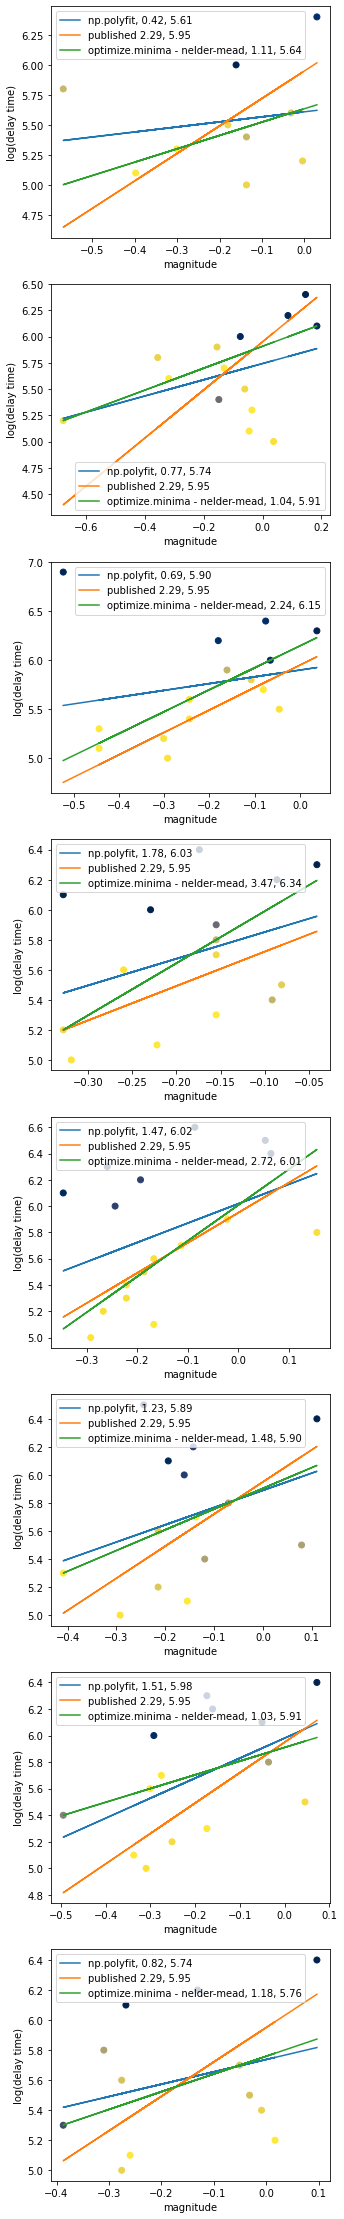

In [54]:
#%conda install ipympl
%matplotlib inline
initial_guess = (0,0)#2.29,5.95)
fig, axs = plt.subplots(8,1, figsize=(5,40))
for r in range(0, 8):
    all_mag = []
    n = []
    tdp_all = []
    for i in results[r]:
        all_mag.append(float(i[0]))
        tdp_all.append(float(i[2]))
        n.append(float(i[3]))
    y = all_mag
    x = tdp_all    
    x = np.array(x)
    
    def obj(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real))
    def obj_2(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum((m_guess-m_real)**2)

    def obj_flipped(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        t_guess = (a*m_real+b)
        return sum(abs(t_guess-t))
    def obj_weighted(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real)*n)

    #===================================================================
    sc = axs[r].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'cividis')
    #axs[r][0].scatter(np.log10(tdp_all), all_mag, marker = '.', color='k')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r].set_xlabel('log(delay time)')
    axs[r].set_ylabel('magnitude')

    #===================================================================
    '''sc = axs[r][1].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r][1].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r][1].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r][1].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r][1].set_xlabel('log(delay time)')
    axs[r][1].set_ylabel('magnitude')'''
    '''sc = axs[r][1].scatter(all_mag, np.log10(tdp_all), c = n, cmap = 'gray')
    #cax = fig.add_axes([0.555, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x= np.array(all_mag), y=np.log10(np.array(tdp_all)), deg=1)
    axs[r][1].plot(np.array(all_mag), a*np.array(all_mag)+b, label='np.polyfit')

    axs[r][1].plot(np.array(all_mag), 0.437*np.array(all_mag)-2.598, label='published-flipped')

    res = optimize.minimize(obj_flipped, initial_guess, method = 'TNC')
    axs[r][1].plot(np.array(all_mag), res.x[0]*np.array(all_mag)+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))'''

    axs[r].set_ylabel('log(delay time)')
    axs[r].set_xlabel('magnitude')
    print(a,b)
    print(res.x[0], res.x[1])
    print(res)
    axs[r].legend()
    axs[r].legend()
    
plt.show()
    

In [32]:
tdp_all

[0.48,
 0.6,
 0.47,
 0.7,
 0.81,
 0.83,
 0.55,
 0.7,
 0.7,
 0.7,
 0.59,
 0.47,
 0.82,
 0.91,
 0.67]

In [ ]:
def obj_weighted(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real)*n)

In [ ]:
plt.hist(tdp_all, bins = np.arange(0, 3, 0.1))

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
sc = axs.scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs.plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs.plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

res = optimize.minimize(obj_weighted, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='weighted  optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs.set_xlabel('log(delay time)')
axs.set_ylabel('magnitude')
axs.legend()

In [ ]:
J = res.jac
JT = J.transpose()
H = np.dot(JT, J)
cov = np.linalg.inv(H)

In [ ]:
H

In [ ]:
U, s, Vh = linalg.svd(res.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
perr = np.sqrt(np.diag(cov))   

In [ ]:
print(min(np.log10(tdp_all)),min(tdp_all))

In [ ]:
plt.scatter(tdp_all, all_mag)

In [ ]:
tdp_all

In [ ]:
#res = optimize.minimize(obj, x0)

In [ ]:
#results

In [ ]:
# plot line of best fit
#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
#perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [ ]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

In [ ]:
popt

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log10(x), y, absolute_sigma = True)
plt.plot(np.log10(x), model_function(np.log10(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [ ]:
popt

In [ ]:
results

In [ ]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [ ]:
popt